       Nodes  Edges  ...  MaximumPageRank  MininumPagerank
0         24     44  ...         0.073606         0.016678
1         24     34  ...         0.088213         0.016522
2         24     36  ...         0.064818         0.016406
3         24     34  ...         0.060561         0.016200
4         25     50  ...         0.065922         0.012178
...      ...    ...  ...              ...              ...
19219     41    252  ...         0.082049         0.004705
19220     44    251  ...         0.086105         0.004699
19221     42    242  ...         0.072473         0.004699
19222     44    241  ...         0.072474         0.005531
19223     42    230  ...         0.082565         0.004773

[19224 rows x 9 columns]


(array([0.5, 5.5]), <a list of 2 Text major ticklabel objects>)

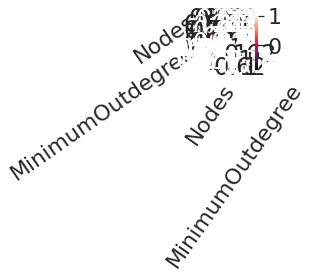

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

import pandas


# load dataset
dataframe = pandas.read_table('/content/complete_replay1.txt')
data1 = dataframe.drop("No.", axis=1)
data2 = data1.drop("State", axis =1)
dataset = dataframe.values

print(data2)

# split into input (X) and output (Y) variables

l = 18565+659   
#l = 18565 + 659
X = dataset[0:l,1:]
# Y = dataset[100:200, 1:10]
# print(X)
# print(X.shape)
labels = []
for i in range (0,l):
  if X[i][9] == 'T':
    labels.append(0)
  else:
    labels.append(1)

features = X[0:l,0:9]

# df = dataframe.corr()

# #print(df)

corrMatrix = data2.corr()
corrMatrix = corrMatrix.replace(np.nan, 0)
#print(corrMatrix)
sn.heatmap(corrMatrix, annot = True, fmt = '.2g')

plt.xticks(rotation=55)
plt.yticks(rotation = 35)
# plt.savefig('corr_fuzzy.PNG', bbox_inches = "tight")
# plt.savefig('corr_fuzzy.svg', bbox_inches = "tight")
# plt.savefig('corr_fuzzy.pdf', bbox_inches = "tight")







[ 0.00064787 -0.00045591  0.17012597  0.          0.17005399  0.00160768
  0.00023995  0.16863827  0.        ]


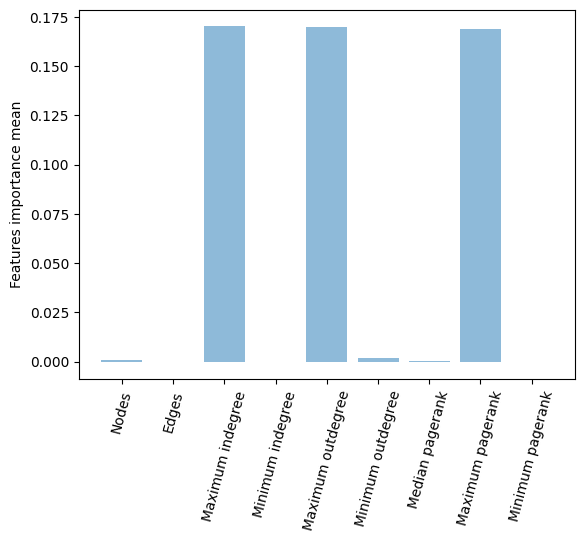

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)

imps = permutation_importance(gaussian_nb, X_test, y_test)
print(imps.importances_mean)
an = ["Nodes","Edges","Maximum indegree","Minimum indegree","Maximum outdegree","Minimum outdegree", "Median pagerank",
      "Maximum pagerank","Minimum pagerank"]
plt.bar(an, np.array(imps.importances_mean), width = .8, align='center', alpha=0.5)
plt.xticks(rotation=75)
plt.ylabel('Features importance mean')
plt.savefig('feature_importance_spoof.pdf', bbox_inches = "tight")
plt.savefig('feature_importance_spoof.PNG', bbox_inches = "tight")
plt.savefig('feature_importance_spoof.svg', bbox_inches = "tight")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
# Split our data
train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.33,
                                                          random_state=42)

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(train, train_labels)

preds = gnb.predict(test)
print(preds)




# Evaluate accuracy
print(accuracy_score(test_labels, preds))

[0 0 1 ... 0 0 0]
0.9678615574783683


In [ ]:
# complete spoof

# [0 0 1 ... 0 0 0]
# 0.9675707118446885

# complete replay

# [0 0 0 ... 0 0 0]
# 1.0

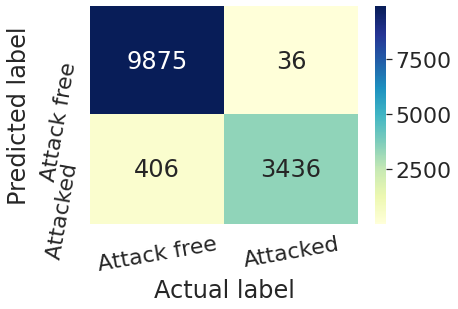

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
from pylab import savefig
import matplotlib.pyplot as plt
%matplotlib inline
cm = confusion_matrix(test_labels, preds)



cm_matrix = pd.DataFrame(data=cm, columns=['Attack free', 'Attacked'], 
                                 index=['   Attack free ', ' Attacked'])
sns.set(font_scale=2.0)
sns.heatmap(cm_matrix, annot=True, fmt= 'd', cmap='YlGnBu')
# plt.title("Confusion Matrix for All attack")
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.yticks(rotation = 80)
plt.xticks(rotation = 10)
plt.rcParams['font.size'] = 4
plt.rcParams['figure.figsize'] = (1, 1)   
plt.savefig('confusion_spoof.pdf', bbox_inches = "tight")
plt.savefig('confusion_spoof.PNG', bbox_inches = "tight")
plt.savefig('confusion_spoof.svg', bbox_inches = "tight")
# cls = classification_report(test_labels, preds, digits = 5)
# figure2 = cls.get_figure()
# figure2.savefig('svm_conf2.pdf')

#plt.rcParams['font.size'] = 12
# # plot histogram with 10 bins
# plt.hist(preds, bins = 10)

# plt.xlabel('Predicted')
# plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

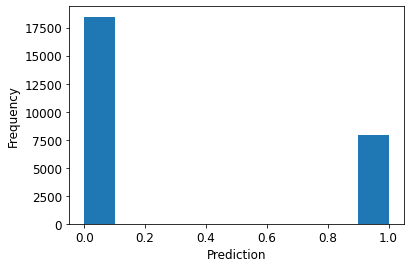

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(preds, bins = 10)

plt.xlabel('Prediction')
plt.ylabel('Frequency')


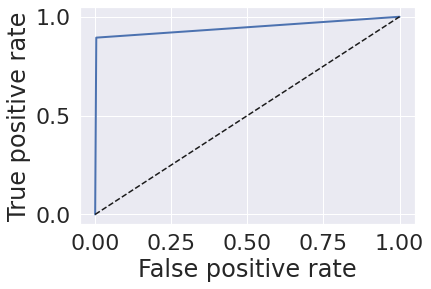

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_labels, preds)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 10



plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

plt.savefig('roc_curve_spoof.pdf', bbox_inches = "tight")
plt.savefig('roc_curve_spoof.PNG', bbox_inches = "tight")
plt.savefig('roc_curve_spoof.svg', bbox_inches = "tight")


In [ ]:
from sklearn.metrics import roc_auc_score

import seaborn as sn
import matplotlib.pyplot as plt
import pandas
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# load dataset
dataframe = pandas.read_table('/content/completeallwithNode.txt')
data = dataframe.drop("No.", axis=1)
dataset = dataframe.values

#print(data)

# split into input (X) and output (Y) variables

l = 79854
#l = 18565 + 659
X = dataset[0:l,1:]
# Y = dataset[100:200, 1:10]
# print(X)
# print(X.shape)
labels = []
for i in range (0,l):
  if X[i][9] == 'T':
    labels.append(0)
  else:
    labels.append(1)

features = X[0:l,0:9]

# df = dataframe.corr()

# #print(df)


# Split our data
train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.33,
                                                          random_state=42)

# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(train, train_labels)

preds = gnb.predict(test)

ROC_AUC = roc_auc_score(test_labels, preds)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9724


In [ ]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, train, train_labels, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9740


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, train, train_labels, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))


print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.97720052 0.97962998 0.97943925 0.98056075 0.9811215  0.98130841
 0.98149533 0.97813084 0.97738318 0.98317757]
Average cross-validation score: 0.9799


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (10, 10)
title_config = {'fontsize': 20, 'y': 1.05}